In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
dataset=pd.read_csv(r"data_hotel.csv")

In [169]:
dataset.head(5)

,Unnamed: 0,name,city,Check_in_date,Check_out_date,Rating,Review,Distance_to_city_center(km),Distance_to_Airpot(km),pool,...,free_parking,bathtub,restuarant,Airport_transfer,Bar,Kitchen,Connecting_rooms_available,Internet_access,Pet_friendly,PRICE
0,0,The Park Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.0,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,5040
1,1,The Westin Hyderabad Mindspace,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,9.9,22.0,yes,...,yes,no,yes,yes,no,no,no,no,no,7800
2,2,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
3,3,Courtyard by Marriott Hyderabad,Hyderabad,12-02-2021,14-02-2021,NaN,NaN,4.7,21.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6700
4,4,Radisson Blu Plaza Hotel Hyderabad Banjara Hills,Hyderabad,12-02-2021,14-02-2021,7.6,Good,4.5,20.0,yes,...,yes,no,yes,yes,no,no,no,no,no,6375


In [170]:
dataset.drop(["Unnamed: 0","Rating","Review"],axis=1,inplace=True)

In [171]:
dataset.isnull().any()

name                           False
city                           False
Check_in_date                  False
Check_out_date                 False
Distance_to_city_center(km)     True
Distance_to_Airpot(km)          True
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

In [172]:
dataset.dtypes

name                            object
city                            object
Check_in_date                   object
Check_out_date                  object
Distance_to_city_center(km)    float64
Distance_to_Airpot(km)         float64
pool                            object
gym                             object
spa                             object
free_parking                    object
bathtub                         object
restuarant                      object
Airport_transfer                object
Bar                             object
Kitchen                         object
Connecting_rooms_available      object
Internet_access                 object
Pet_friendly                    object
PRICE                            int64
dtype: object

In [173]:
dataset.drop(["Check_in_date","Check_out_date"],axis=1,inplace=True)

In [174]:
dataset["name"].value_counts()

Courtyard by Marriott Mumbai International Airport    9
Best Western Ashoka                                   8
Highland Choj                                         7
Elita Rooms                                           7
Fairfield by Marriott Kolkata                         7
                                                     ..
Hotel Viva Baga                                       1
Wild Berry Resort Agonda                              1
OYO 23108 Hotel Bagga Vilas                           1
Fairfield By Marriott Bengaluru Rajajinagar           1
Ulo Millionaire Park                                  1
Name: name, Length: 1983, dtype: int64

# 1. Handle Missing values

In [175]:
dataset.isnull().sum()

name                            0
city                            0
Distance_to_city_center(km)    23
Distance_to_Airpot(km)         23
pool                            0
gym                             0
spa                             0
free_parking                    0
bathtub                         0
restuarant                      0
Airport_transfer                0
Bar                             0
Kitchen                         0
Connecting_rooms_available      0
Internet_access                 0
Pet_friendly                    0
PRICE                           0
dtype: int64

In [176]:
dataset.median()

Distance_to_city_center(km)       8.2
Distance_to_Airpot(km)           10.0
PRICE                          9397.5
dtype: float64

In [177]:
dataset.fillna(dataset.median(),inplace=True)

In [178]:
dataset.isnull().any()

name                           False
city                           False
Distance_to_city_center(km)    False
Distance_to_Airpot(km)         False
pool                           False
gym                            False
spa                            False
free_parking                   False
bathtub                        False
restuarant                     False
Airport_transfer               False
Bar                            False
Kitchen                        False
Connecting_rooms_available     False
Internet_access                False
Pet_friendly                   False
PRICE                          False
dtype: bool

# divide data into numerical and categorical type

In [179]:
num=[]

In [180]:
for col in dataset.columns:
    if(dataset[col].dtypes!="object"):
          num.append(col)

In [181]:
dataset_num=dataset[num]

In [185]:
cat=[]

In [186]:
for col in dataset.columns:
    if(dataset[col].dtypes!="object"):
          cat.append(col)

In [187]:
dataset_cat=dataset[cat]

In [188]:
cat

['Distance_to_city_center(km)', 'Distance_to_Airpot(km)', 'PRICE']

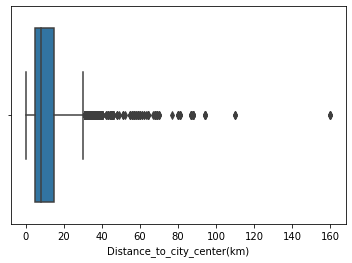

In [189]:
sns.boxplot(dataset_num["Distance_to_city_center(km)"])

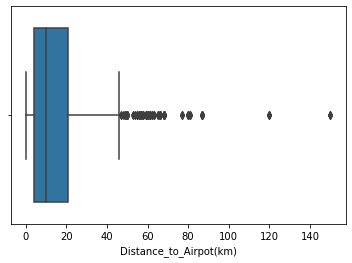

In [190]:
sns.boxplot(dataset_num["Distance_to_Airpot(km)"])

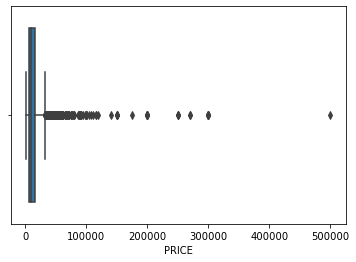

In [191]:
sns.boxplot(dataset_num["PRICE"])

# Handling Outliers

In [192]:
for col in dataset_num.columns:
    q1=dataset_num[col].describe()["25%"]
    q3=dataset_num[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    count=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)].shape[0]
    p=count/5342*100
if (count>0):
            print("======================"+col+"======================")
            print("count",count)
            print("Percentage",p)

======================PRICE======================
count 381
Percentage 7.1321602396106325


In [193]:
outliers=dataset_num[(dataset_num[col]<lb)  | (dataset_num[col]>ub)]

In [194]:
lb_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]<lb)]["PRICE"],lb)

In [195]:
ub_dict={}.fromkeys(dataset_num[(dataset_num["PRICE"]>ub)]["PRICE"],ub)

In [196]:
lb_dict.update(ub_dict)

In [197]:
dataset_num["PRICE"]=dataset_num["PRICE"].replace(lb_dict)

<ipython-input-197-3d2b748ece85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_num["PRICE"]=dataset_num["PRICE"].replace(lb_dict)


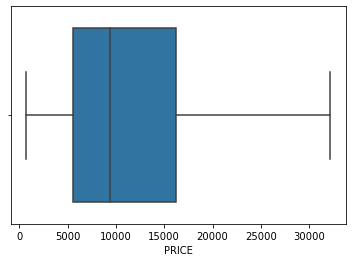

In [198]:
sns.boxplot(dataset_num["PRICE"])

# Encoding the data


In [211]:
name_dict=dataset["name"].value_counts().to_dict()

In [212]:
dataset["name"]=dataset["name"].replace(name_dict)

In [213]:
dataset["name"]

0       837.0
1       837.0
2       837.0
3       837.0
4       837.0
        ...  
5337    528.0
5338    528.0
5339    528.0
5340    528.0
5341    528.0
Name: name, Length: 5342, dtype: float64

In [215]:
city_dict=dataset["city"].value_counts().to_dict()

In [216]:
dataset["city"]=dataset["city"].replace(city_dict)

In [218]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [222]:
dataset=dataset[["name","city","Distance_to_city_center(km)","Distance_to_Airpot(km)","spa_yes","free_parking_yes","bathtub_yes","restuarant_yes","Airport_transfer_yes","Bar_yes","Kitchen_yes","Connecting_rooms_available_yes","Internet_access_yes","Pet_friendly_yes","PRICE"]]

In [223]:
dataset

,name,city,Distance_to_city_center(km),Distance_to_Airpot(km),spa_yes,free_parking_yes,bathtub_yes,restuarant_yes,Airport_transfer_yes,Bar_yes,Kitchen_yes,Connecting_rooms_available_yes,Internet_access_yes,Pet_friendly_yes,PRICE
0,837.0,837,4.0,20.0,1,1,0,1,1,0,0,0,0,0,5040
1,837.0,837,9.9,22.0,1,1,0,1,1,0,0,0,0,0,7800
2,837.0,837,4.7,21.0,1,1,0,1,1,0,0,0,0,0,6700
3,837.0,837,4.7,21.0,1,1,0,1,1,0,0,0,0,0,6700
4,837.0,837,4.5,20.0,1,1,0,1,1,0,0,0,0,0,6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,528.0,528,4.9,9.7,0,1,1,0,0,0,0,0,0,0,46349
5338,528.0,528,1.6,8.0,0,0,1,0,0,0,0,0,0,0,8793
5339,528.0,528,77.0,77.0,0,1,0,0,0,0,0,0,0,0,5396
5340,528.0,528,11.0,16.0,0,0,1,0,0,0,0,0,0,0,6950


# Splitting into train and test data

In [224]:
x=dataset.iloc[:,0:14].values

In [225]:
y=dataset.iloc[:,14]

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
sc=StandardScaler()

In [230]:
x_train=sc.fit_transform(x_train)

In [231]:
x_test=sc.transform(x_test)

# Building a model

In [232]:
from sklearn.linear_model import Ridge
ri_model=Ridge(alpha=1)
ri_model.fit(x_train,y_train)
y_predri=ri_model.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_predri)
print("Rmse:",np.sqrt(mse))
r2_scoreri=r2_score(y_test,y_predri)
print("r2_score:",r2_scoreri)

Rmse: 23957.604664937197
r2_score: 0.013729100440554198


In [233]:
from sklearn.linear_model import Lasso
la_model=Lasso(alpha=1)
la_model.fit(x_train,y_train)
y_predla=la_model.predict(x_test)

mse=mean_squared_error(y_test,y_predla)
print("Rmse:",np.sqrt(mse))
r2_scorela=r2_score(y_test,y_predla)
print("r2_score",r2_scorela)

Rmse: 23957.61688352294
r2_score 0.013728094426906812


In [234]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_features='auto')
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)


mse=mean_squared_error(y_test,y_preddt)
print("Rmse:",np.sqrt(mse))
r2_scoredt=r2_score(y_test,y_preddt)
print("r2_score",r2_scoredt)


Rmse: 17884.197726546696
r2_score 0.4503979342163904


In [235]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
adb=AdaBoostRegressor(n_estimators=10)
adb.fit(x_train,y_train)
y_predadb=adb.predict(x_test)



mse=mean_squared_error(y_test,y_predadb)
print("Rmse:",np.sqrt(mse))
r2_scoreadb=r2_score(y_test,y_predadb)
print("r2_score",r2_scoreadb)

Rmse: 24573.15047960218
r2_score -0.037602743196904376


In [236]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

gbm=GradientBoostingRegressor(n_estimators=10)
gbm.fit(x_train,y_train)
y_predgbm=gbm.predict(x_test)


mse=mean_squared_error(y_test,y_predgbm)
print("Rmse:",np.sqrt(mse))
r2_scoregbm=r2_score(y_test,y_predgbm)
print("r2_score",r2_scoregbm)

Rmse: 23752.089475387118
r2_score 0.030577551829497174


In [237]:
from sklearn.svm import SVR
sv=SVR(kernel="linear")
sv.fit(x_train,y_train)
y_predsvr=sv.predict(x_test)

mse=mean_squared_error(y_test,y_predsvr)
print("Rmse:",np.sqrt(mse))
r2_scoresvr=r2_score(y_test,y_predsvr)
print("r2_score",r2_scoresvr)

Rmse: 24548.400305418614
r2_score -0.03551364064387941


In [238]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

xgb=XGBRegressor(n_estimators=10)
xgb.fit(x_train,y_train)
y_predxg=xgb.predict(x_test)


mse=mean_squared_error(y_test,y_predxg)
print("Rmse:",np.sqrt(mse))
r2_scorexg=r2_score(y_test,y_predxg)
print("r2_score",r2_scorexg)

Rmse: 21675.055352447922
r2_score 0.19270946369229358


In [239]:
from sklearn.naive_bayes import GaussianNB
regressor_nb=GaussianNB()
regressor_nb.fit(x_train,y_train)
y_prednb=regressor_nb.predict(x_test)


mse=mean_squared_error(y_test,y_prednb)
print("Rmse:",np.sqrt(mse))
r2_scorenb=r2_score(y_test,y_prednb)
print("r2_score",r2_scorenb)

Rmse: 26144.951876543088
r2_score -0.17458682315413654


In [240]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)

mse=mean_squared_error(y_test,y_predrf)
print("Rmse:",np.sqrt(mse))
r2_scorerf=r2_score(y_test,y_predrf)
print("r2_score",r2_scorerf)

Rmse: 18267.99132082993
r2_score 0.4265559853548313


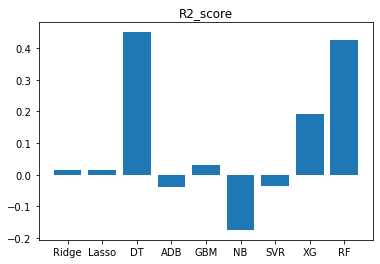

In [241]:
x=["Ridge","Lasso","DT","ADB","GBM","NB","SVR","XG","RF"]
y=[r2_scoreri,r2_scorela,r2_scoredt,r2_scoreadb,r2_scoregbm,r2_scorenb,r2_scoresvr,r2_scorexg,r2_scorerf]
plt.bar(x,y)
plt.title("R2_score")
plt.show()

# Hyperparameter tuning in DT

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [151]:
dt=DecisionTreeRegressor()

In [152]:
max_depth=np.linspace(3,100,num=2,dtype="int")
max_features=['auto','sqrt','log2']
min_samples_leaf=[1,2,5,10,15]
min_samples_split=[2,5,10,15,30,50]
criterion=['mse']

In [153]:
param_dict={"max_depth":max_depth,
            "max_features":max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_samples_split":min_samples_split,
            "criterion":criterion
           }

In [154]:
param_dict

{'max_depth': array([  3, 100]),
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 5, 10, 15],
 'min_samples_split': [2, 5, 10, 15, 30, 50],
 'criterion': ['mse']}

In [155]:
gsv= GridSearchCV(dt,param_grid=param_dict,scoring="r2", n_jobs=-1,cv=5,verbose=5,return_train_score=True)

In [156]:
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': array([  3, 100]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 30, 50]},
             return_train_score=True, scoring='r2', verbose=5)

In [157]:
y_predgsv=gsv.predict(x_test)

In [158]:
gsv.best_score_

1.0

In [159]:
gsv.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='auto')

In [160]:
gsv.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# RandomizedSearchCV

In [161]:
rmsv=RandomizedSearchCV(dt,param_distributions=param_dict,scoring="r2", n_jobs=-1,cv=3,verbose=5,return_train_score=True)

In [162]:
rmsv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': array([  3, 100]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              50]},
                   return_train_score=True, scoring='r2', verbose=5)

In [163]:
y_predrmsv=rmsv.predict(x_test)

In [164]:
rmsv.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_split=10)

In [165]:
rmsv.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3,
 'criterion': 'mse'}

In [166]:
rmsv.best_score_

1.0

# cat_boost

In [349]:
from catboost import CatBoostRegressor


In [350]:
categorical_features_indices = np.where(dataset.dtypes != np.float)[0]

In [353]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_test, y_test),plot=True)

CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features